In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

In [28]:
titanic_downloads = pd.read_csv('train.csv')

In [29]:
titanic_downloads

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic_downloads.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_downloads.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
titanic_downloads.shape

(891, 12)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_downloads, titanic_downloads[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_downloads.loc[train_indices]
    strat_test_set = titanic_downloads.loc[test_indices]

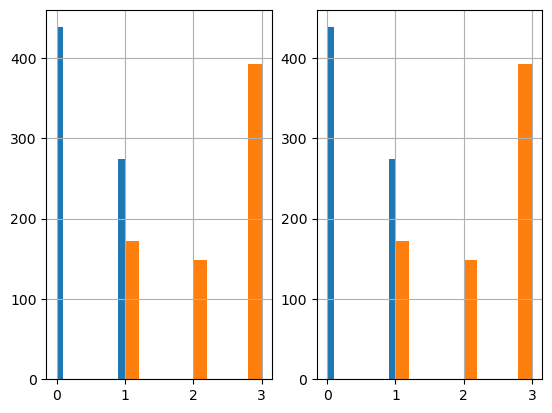

In [16]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.show()
#20:01

In [17]:
total = titanic_downloads.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_downloads.isnull().sum()/titanic_downloads.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

titanic_downloads.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

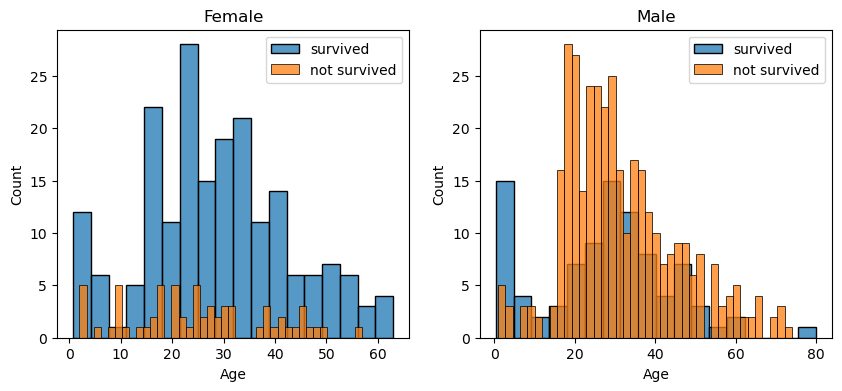

In [18]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_downloads[titanic_downloads['Sex']=='female']
men = titanic_downloads[titanic_downloads['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [19]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 242 to 387
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


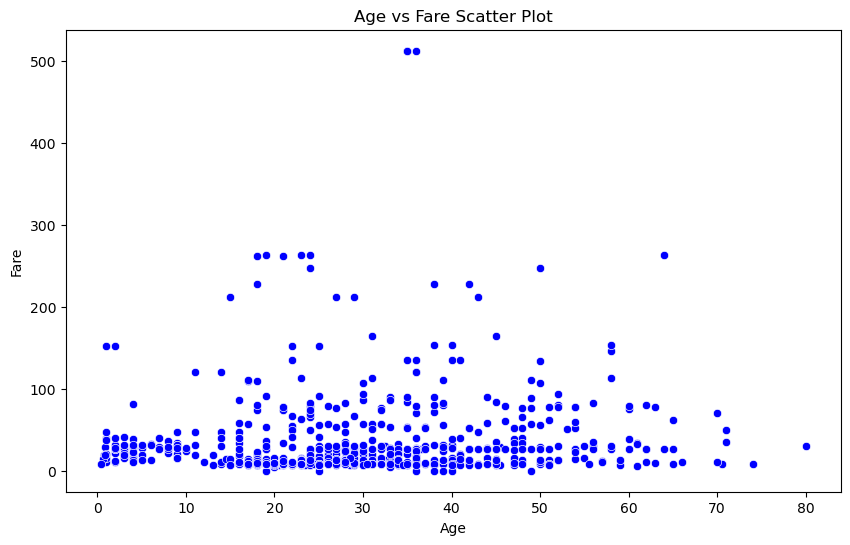

In [20]:
# Scatter Plot to show the relationship between Age and Fare
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(titanic_downloads, x='Age', y='Fare', color='blue', ax=ax)
ax.set_title('Age vs Fare Scatter Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

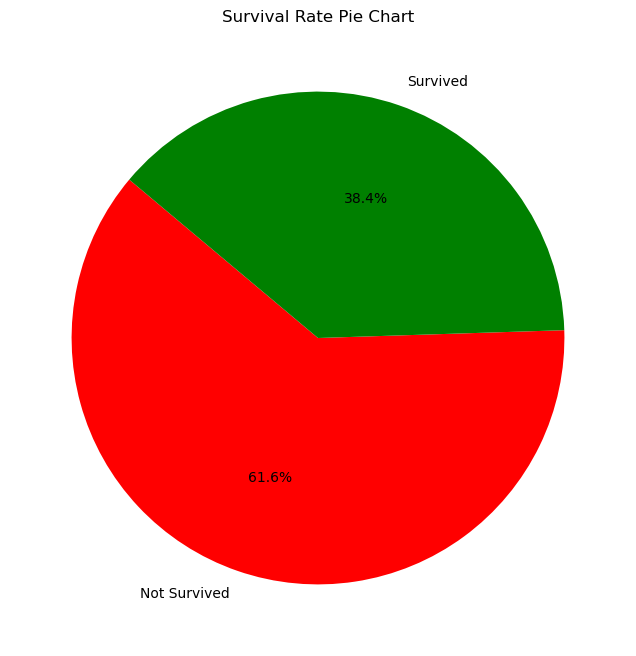

In [21]:
# Pie Chart to display the proportion of passengers who survived and didn't survive
survival_counts = titanic_downloads['Survived'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
ax.set_title('Survival Rate Pie Chart')
plt.show()

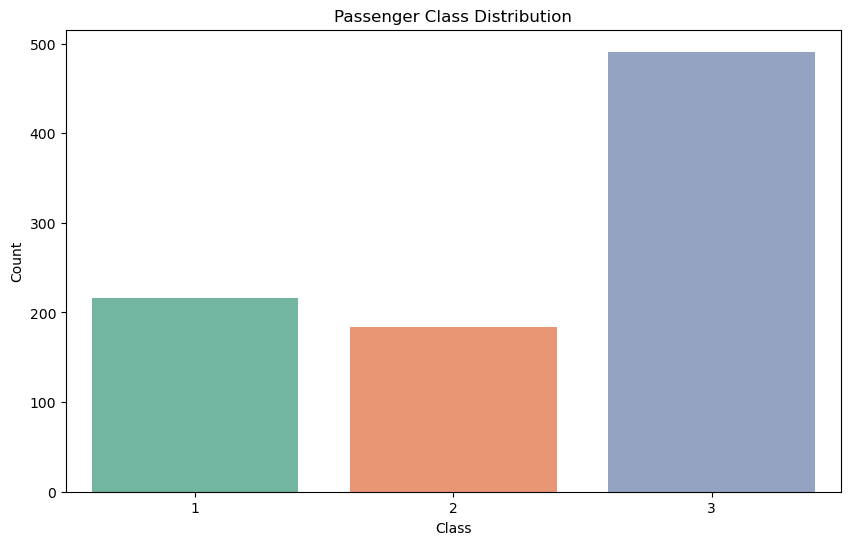

In [22]:
# Bar Chart to illustrate the distribution of passengers across different classes
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(titanic_downloads, x='Pclass', palette='Set2', ax=ax)
ax.set_title('Passenger Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()

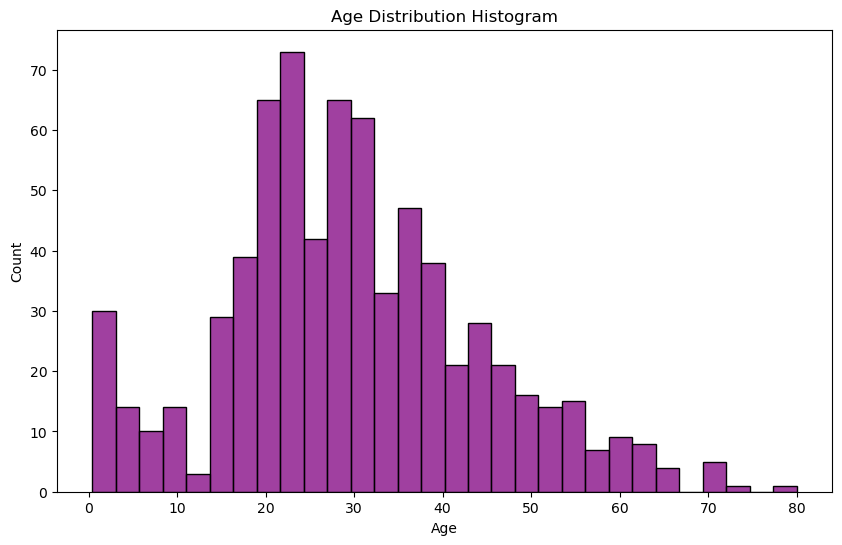

In [23]:
# Histogram to view the age distribution of passengers
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(titanic_downloads['Age'].dropna(), kde=False, bins=30, color='purple', ax=ax)
ax.set_title('Age Distribution Histogram')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

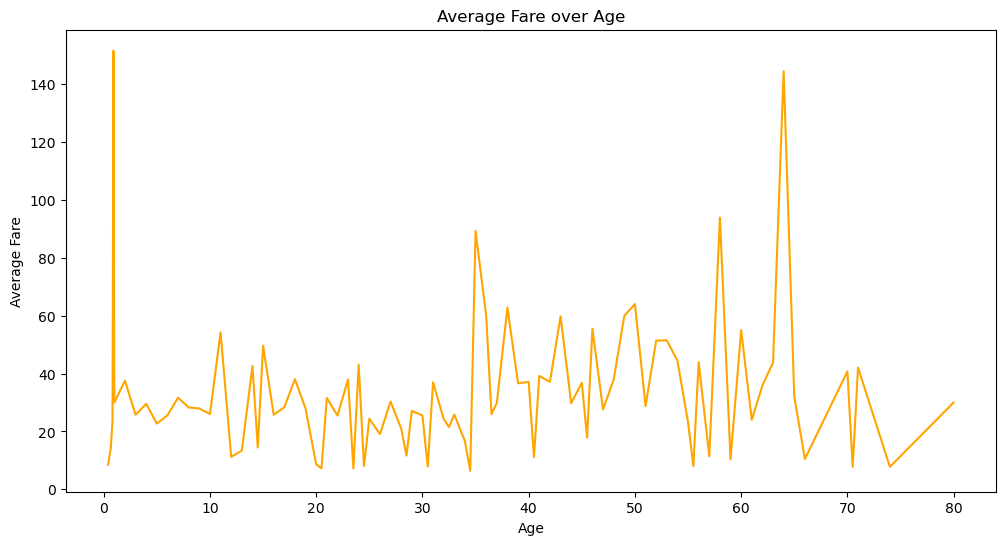

In [24]:
# Line Graph to depict the average fare paid by passengers of different ages
age_fare_avg = titanic_downloads.groupby('Age')['Fare'].mean()
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=age_fare_avg.index, y=age_fare_avg.values, color='orange', ax=ax)
ax.set_title('Average Fare over Age')
ax.set_xlabel('Age')
ax.set_ylabel('Average Fare')
plt.show()

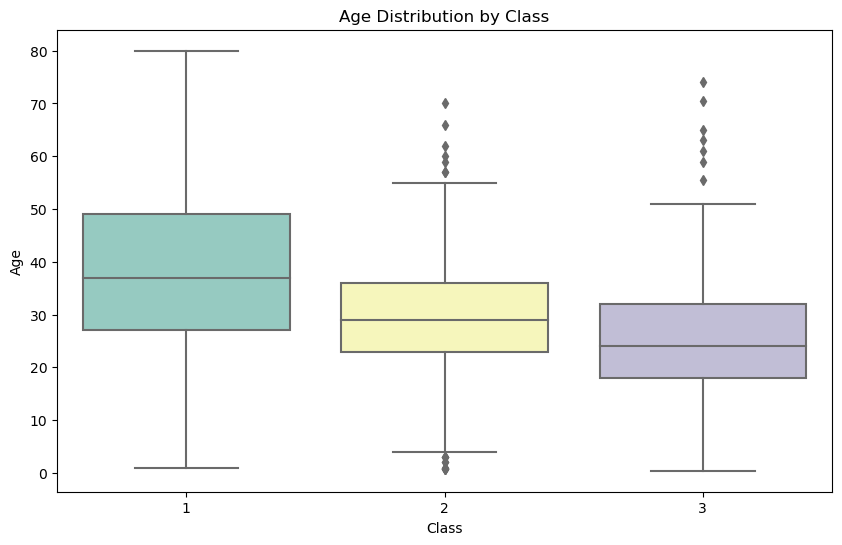

In [25]:
# Box Plot to show the age distribution across different passenger classes
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(titanic_downloads, x='Pclass', y='Age', palette='Set3', ax=ax)
ax.set_title('Age Distribution by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Age')
plt.show()

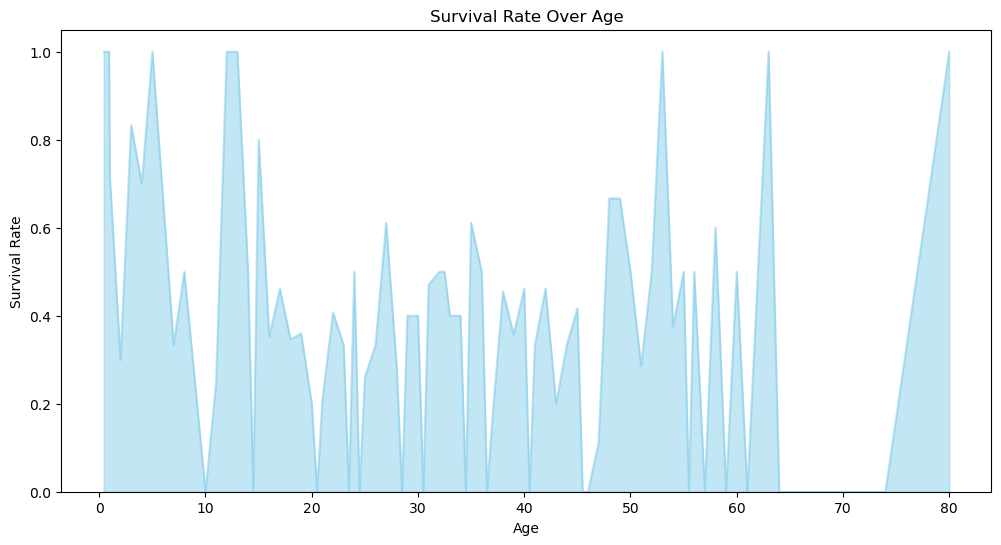

In [26]:
# Area Chart to depict the survival rate across different ages
age_survival = titanic_downloads.groupby('Age')['Survived'].mean()
fig, ax = plt.subplots(figsize=(12, 6))
age_survival.plot(kind='area', alpha=0.5, color='skyblue', ax=ax)
ax.set_title('Survival Rate Over Age')
ax.set_xlabel('Age')
ax.set_ylabel('Survival Rate')
plt.show()

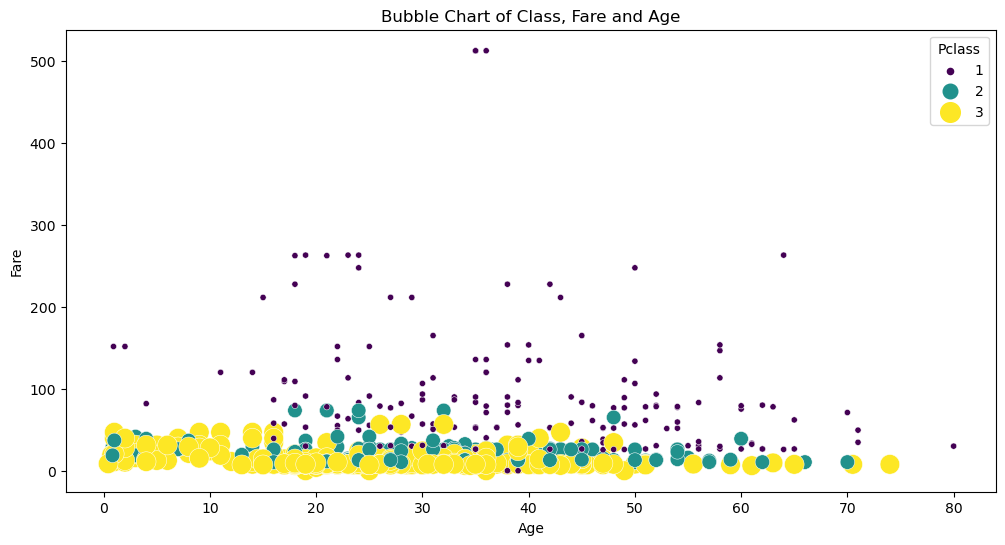

In [27]:
# Creating the Bubble Chart to represent a combination of class, fare, and age
plt.figure(figsize=(12, 6))
sns.scatterplot(titanic_downloads, x='Age', y='Fare', size='Pclass', hue='Pclass', sizes=(20, 200), palette='viridis', legend='full')
plt.title('Bubble Chart of Class, Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

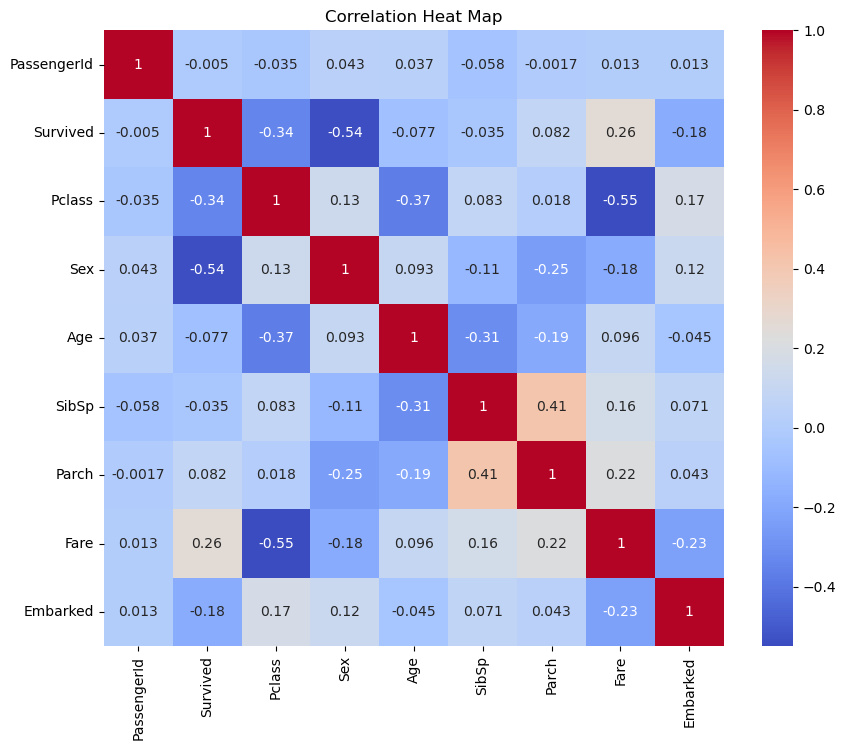

In [29]:
# Heat Map to display the correlation matrix of different numerical variables
# Convert 'Sex' and 'Embarked' from string to numeric if they are in string format
if titanic_downloads['Sex'].dtype == 'object':
    titanic_downloads['Sex'] = titanic_downloads['Sex'].astype('category').cat.codes

if 'Embarked' in titanic_downloads.columns and titanic_downloads['Embarked'].dtype == 'object':
    titanic_downloads['Embarked'] = titanic_downloads['Embarked'].astype('category').cat.codes

# Select only numeric columns for the correlation matrix
numeric_titanic_downloads = titanic_downloads.select_dtypes(include=[np.number])

# Generating the Heat Map (Correlation Matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_titanic_downloads.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

In [30]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 242 to 387
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator, TransformerMixin):
    
    def fit (self, X, y=None):
        return self
    
    def transform (self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [32]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit (self, X, y=None):
        return self
    
    def transform (self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [33]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
      def fit (self, X, y=None):
        return self
    
      def transform (self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [34]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()), 
                    ("featuredropper", FeatureDropper())])

In [35]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [36]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
242,243,0,2,29.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
834,835,0,3,18.000000,0,0,8.3000,0.0,0.0,1.0,0.0,1.0
340,341,1,2,2.000000,1,1,26.0000,0.0,0.0,1.0,0.0,1.0
34,35,0,1,28.000000,1,0,82.1708,1.0,0.0,0.0,0.0,1.0
739,740,0,3,29.553275,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
404,405,0,3,20.000000,0,0,8.6625,0.0,0.0,1.0,1.0,0.0
50,51,0,3,7.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
86,87,0,3,16.000000,1,3,34.3750,0.0,0.0,1.0,0.0,1.0
319,320,1,1,40.000000,1,1,134.5000,1.0,0.0,0.0,1.0,0.0


In [37]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 242 to 387
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [38]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [40]:
final_clf = grid_search.best_estimator_

In [41]:
final_clf

RandomForestClassifier(max_depth=5)

In [42]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [43]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [44]:
final_clf.score(X_data_test, y_data_test)

0.8324022346368715

In [45]:
final_data = pipeline.fit_transform(titanic_downloads)

In [46]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,0.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,0.0,1.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,0.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,0.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,0.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,0.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,0.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,0.0,1.0,0.0,0.0,1.0


In [47]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [48]:
prod_clf = RandomForestClassifier()

param_gird = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [49]:
prod_final_clf = grid_search.best_estimator_

In [50]:
#titanic_downloads = pd.read_csv('train.csv')

In [51]:
titanic_downloads = pd.read_csv("test.csv")

In [52]:
final_titanic_downloads = pipeline.fit_transform(titanic_downloads)

In [53]:
X_final_test = final_titanic_downloads
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_downloads_final_test = scaler.fit_transform(X_final_test)

In [54]:
predictions = prod_final_clf.predict(X_downloads_final_test)

In [55]:
final_df = pd.DataFrame(titanic_downloads['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("titanic_downloads_predictions.csv", index=False)

In [56]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [35]:
# Example of loading data
titanic_downloads = pd.read_csv('titanic_downloads_predictions.csv')

# Assume preprocessing is done and you have X (features) and y (target)
X = titanic_downloads.drop('Survived', axis=1)
y = titanic_downloads['Survived']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 0.6834 - accuracy: 0.5967 - val_loss: 0.6579 - val_accuracy: 0.7647
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6668 - accuracy: 0.6533 - val_loss: 0.6399 - val_accuracy: 0.7647
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6586 - accuracy: 0.6533 - val_loss: 0.6268 - val_accuracy: 0.7647
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6529 - accuracy: 0.6533 - val_loss: 0.6199 - val_accuracy: 0.7647
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.6533 - val_loss: 0.6168 - val_accuracy: 0.7647
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6533 - val_loss: 0.6128 - val_accuracy: 0.7647
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6494 - accuracy: 0.6533 - val_loss: 0.6119 - val_accuracy: 0.7647
Epoch 8/10
10/10 [=

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


3/3 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.6667
Test Accuracy: 0.6666666865348816


In [40]:
predictions = model.predict(X_test)
# Convert predictions to binary outcomes
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]


3/3 [==============================] - 0s 3ms/step
